[View in Colaboratory](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/PyTorch_YOLOv3.ipynb)

# PyTorch-YOLOv3

- 깃헙 원문링크: https://github.com/eriklindernoren/PyTorch-YOLOv3
- PyTorch 로 구현한 YOLOv3 를 Colaboratory 에서 실행해보자. 

## 우선 git clone


In [65]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

Cloning into 'PyTorch-YOLOv3'...
remote: Counting objects: 272, done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 272 (delta 124), reused 172 (delta 50), pack-reused 0
Receiving objects: 100% (272/272), 16.02 MiB | 3.89 MiB/s, done.
Resolving deltas: 100% (124/124), done.


## 폴더 이동후 필요한 package 를 설치해준다

In [66]:
cd PyTorch-YOLOv3/

/content/PyTorch-YOLOv3/PyTorch-YOLOv3/PyTorch-YOLOv3


In [67]:
!pip3 install -r requirements.txt

## 에러 발생. 
- torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
- Pillow 버전이 맞지 않는다고 하니 기존의 Pillow 를 uninstall 한 다음 최신으로 install 해준다. 

In [68]:
!pip3 uninstall Pillow -y

Uninstalling Pillow-5.1.0:
  Successfully uninstalled Pillow-5.1.0


In [69]:
!pip3 install Pillow


  Using cached https://files.pythonhosted.org/packages/5f/4b/8b54ab9d37b93998c81b364557dff9f61972c0f650efa0ceaf470b392740/Pillow-5.1.0-cp36-cp36m-manylinux1_x86_64.whl


## 이미 학습 완료한 weight 를 다운로드 받는다

In [70]:
cd weights/

/content/PyTorch-YOLOv3/PyTorch-YOLOv3/PyTorch-YOLOv3/weights


In [71]:
# 스크립트 내용을 한 번 볼까? 
cat /content/PyTorch-YOLOv3/weights/download_weights.sh

#!/bin/bash

wget https://pjreddie.com/media/files/yolov3.weights


In [72]:
!bash download_weights.sh

--2018-06-05 09:11:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights       80%[===============>    ] 189.60M  2.61MB/s    eta 13s    

yolov3.weights      100%[===================>] 236.52M  4.14MB/s    in 71s     

2018-06-05 09:13:01 (3.33 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



# 이제 예측을 해보자 
- 상위 폴더로 이동후 
- detect.py 파일을 실행하자
- 이때 --image_folder 옵션에 이미지들이 들어있는 폴더를 지정해주면 된다. 

In [73]:
cd ..

/content/PyTorch-YOLOv3/PyTorch-YOLOv3/PyTorch-YOLOv3


In [74]:
!python3 detect.py --image_folder data/samples

Namespace(batch_size=1, class_path='data/coco.names', conf_thres=0.8, config_path='config/yolov3.cfg', image_folder='data/samples', img_size=416, n_cpu=8, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:02.499328
	+ Batch 1, Inference Time: 0:00:01.494642
	+ Batch 2, Inference Time: 0:00:01.516047
	+ Batch 3, Inference Time: 0:00:01.490245
	+ Batch 4, Inference Time: 0:00:01.513237
	+ Batch 5, Inference Time: 0:00:01.525376
	+ Batch 6, Inference Time: 0:00:01.525737
	+ Batch 7, Inference Time: 0:00:01.517595
	+ Batch 8, Inference Time: 0:00:01.505096
	+ Batch 9, Inference Time: 0:00:01.514317

Saving images:
(0) Image: 'data/samples/dog.jpg'
	+ Label: dog, Conf: 0.98672
	+ Label: bicycle, Conf: 0.99962
	+ Label: truck, Conf: 0.92447
(1) Image: 'data/samples/eagle.jpg'
	+ Label: bird, Conf: 0.99697
(2) Image: 'data/samples/giraffe.jpg'
	+ Label: giraffe, Conf: 0.99921
	+ Label: zebra, Conf: 0.94799
(3) Image: 'data/sam

## 기본 제공하는 sample 폴더 내용을 확인해보자

In [75]:
ls -al /content/PyTorch-YOLOv3/data/samples/

total 1432
drwxr-xr-x 2 root root   4096 Jun  5 07:41 ./
drwxr-xr-x 3 root root   4096 Jun  5 07:41 ../
-rw-r--r-- 1 root root 163759 Jun  5 07:41 dog.jpg
-rw-r--r-- 1 root root 141886 Jun  5 07:41 eagle.jpg
-rw-r--r-- 1 root root 382965 Jun  5 07:41 giraffe.jpg
-rw-r--r-- 1 root root 133495 Jun  5 07:41 herd_of_horses.jpg
-rw-r--r-- 1 root root  78771 Jun  5 07:41 img1.jpg
-rw-r--r-- 1 root root 113300 Jun  5 07:41 img2.jpg
-rw-r--r-- 1 root root 102770 Jun  5 07:41 img3.jpg
-rw-r--r-- 1 root root  84988 Jun  5 07:41 img4.jpg
-rw-r--r-- 1 root root 126867 Jun  5 07:41 messi.jpg
-rw-r--r-- 1 root root 113880 Jun  5 07:41 person.jpg


## 이미지 하나를 뿌려보자

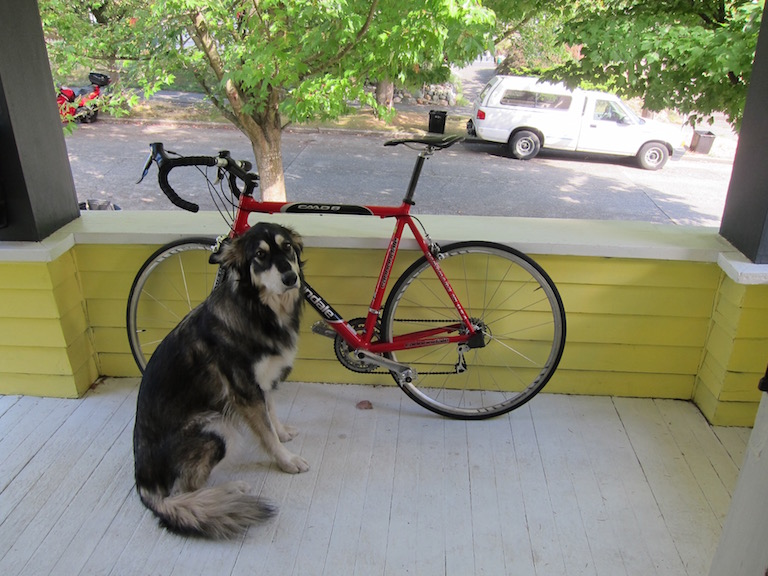

In [76]:
from IPython.display import Image
Image('/content/PyTorch-YOLOv3/data/samples/dog.jpg')

## YOLO가 예측하여 사각형을 그린 이미지를 확인해보자

In [77]:
ls -al /content/PyTorch-YOLOv3/output/

total 2504
drwxr-xr-x  2 root root   4096 Jun  5 07:57 ./
drwxr-xr-x 13 root root   4096 Jun  5 08:50 ../
-rw-r--r--  1 root root 342846 Jun  5 08:50 0.png
-rw-r--r--  1 root root 103527 Jun  5 08:50 1.png
-rw-r--r--  1 root root 129507 Jun  5 08:50 2.png
-rw-r--r--  1 root root 286465 Jun  5 08:50 3.png
-rw-r--r--  1 root root 198527 Jun  5 08:37 4.png
-rw-r--r--  1 root root 237400 Jun  5 08:37 5.png
-rw-r--r--  1 root root 319669 Jun  5 08:37 6.png
-rw-r--r--  1 root root 334549 Jun  5 08:37 7.png
-rw-r--r--  1 root root 264733 Jun  5 08:37 8.png
-rw-r--r--  1 root root 323531 Jun  5 08:37 9.png


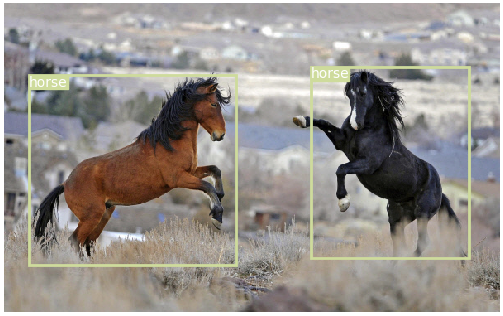

In [84]:
Image('/content/PyTorch-YOLOv3/output/3.png')


# 내 Drive 내의 이미지에 접근해보자. 
- Colaboratory 에 파일을 올리는 방법은 여러가지가 있는데 
- 여기서는 google Drive 에 접근하여 미리 올려둔 이미지를 이용하도록 한다. 

### 아래 구글 계정 인증은 이상하게 한번에 안된다. 
- 한번 에러나고 나면
- 다시 실행하자 

In [79]:
cd /content/PyTorch-YOLOv3/PyTorch-YOLOv3

/content/PyTorch-YOLOv3/PyTorch-YOLOv3


In [80]:
ls -al

total 92
drwxr-xr-x 12 root root  4096 Jun  5 09:11 ./
drwxr-xr-x 13 root root  4096 Jun  5 08:50 ../
drwxr-xr-x  2 root root  4096 Jun  5 07:46 assets/
drwxr-xr-x  2 root root  4096 Jun  5 07:46 config/
drwxr-xr-x  3 root root  4096 Jun  5 07:46 data/
-rw-r--r--  1 root root  5029 Jun  5 07:46 detect.py
drwxr-xr-x  2 root root  4096 Jun  5 08:42 drive/
drwxr-xr-x  8 root root  4096 Jun  5 07:46 .git/
-rw-r--r--  1 root root    92 Jun  5 07:46 .gitignore
-rw-r--r--  1 root root 13755 Jun  5 07:46 models.py
drwxr-xr-x  2 root root  4096 Jun  5 08:47 output/
drwxr-xr-x  2 root root  4096 Jun  5 08:47 __pycache__/
drwxr-xr-x 10 root root  4096 Jun  5 09:13 PyTorch-YOLOv3/
-rw-r--r--  1 root root  3524 Jun  5 07:46 README.md
-rw-r--r--  1 root root    62 Jun  5 07:46 requirements.txt
-rw-r--r--  1 root root  3596 Jun  5 07:46 test.py
-rw-r--r--  1 root root  3747 Jun  5 07:46 train.py
drwxr-xr-x  3 root root  4096 Jun  5 08:47 utils/
drwxr-xr-x  2 root root  4096 Jun  5 07:46 weights/


## 아래 스크립트는 그냥 실행하자.
- 링크가 나오면 클릭하여 구글인증을 하고 
- Verification code 를 입력해주면 된다. 
- 오류가 나면 이 셀을 다시 실행해서 반복해주면 되낟. 

In [81]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth

auth.authenticate_user()

from oauth2client.client import GoogleCredentials

creds = GoogleCredentials.get_application_default()

import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

vcode = getpass.getpass()

!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpfsq22nn0/pubring.gpg' created
gpg: /tmp/tmpfsq22nn0/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


KeyboardInterrupt: ignored

## 디렉토리를 만들고 mount 해주면 쓸 수 있게 된다. 
- drive 폴더로 들어가보면 인증한 구글계정의 구글 드라이브 라는 것을 알 수 있다.

In [0]:
!mkdir -p drive 

!google-drive-ocamlfuse drive 

## 이제 예측을 해보자 
- 예를 들어 google drive 의 test_images 라는 폴더에 테스트할 jpg 이미지들을 넣어두었다면
- 아래와 같이 predict 해주면 된다. 

In [43]:
!python3 detect.py --image_folder /content/PyTorch-YOLOv3/drive/test_images

Namespace(batch_size=1, class_path='data/coco.names', conf_thres=0.8, config_path='config/yolov3.cfg', image_folder='PyTorch-YOLOv3/drive/app', img_size=416, n_cpu=8, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:
Traceback (most recent call last):
  File "detect.py", line 60, in <module>
    for batch_i, (img_paths, input_imgs) in enumerate(dataloader):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 286, in __next__
    return self._process_next_batch(batch)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 307, in _process_next_batch
    raise batch.exc_type(batch.exc_msg)
OSError: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 57, in <list

## 마찬가지로 output 폴더에 가보면 결과를 확인할 수 있다. 

In [53]:
ls -al output/

total 2504
drwxr-xr-x  2 root root   4096 Jun  5 07:57 ./
drwxr-xr-x 13 root root   4096 Jun  5 08:50 ../
-rw-r--r--  1 root root 342846 Jun  5 08:50 0.png
-rw-r--r--  1 root root 103527 Jun  5 08:50 1.png
-rw-r--r--  1 root root 129507 Jun  5 08:50 2.png
-rw-r--r--  1 root root 286465 Jun  5 08:50 3.png
-rw-r--r--  1 root root 198527 Jun  5 08:37 4.png
-rw-r--r--  1 root root 237400 Jun  5 08:37 5.png
-rw-r--r--  1 root root 319669 Jun  5 08:37 6.png
-rw-r--r--  1 root root 334549 Jun  5 08:37 7.png
-rw-r--r--  1 root root 264733 Jun  5 08:37 8.png
-rw-r--r--  1 root root 323531 Jun  5 08:37 9.png


In [64]:
Image('output/0.png')